<h1 style="font-family:Serif;font-size:150%;color: #faedcd;text-align:right"> 
AMINATA SANGHO<br>
HIBA KHOUZAI</h1>


<h1 style="background-color:#bc6c25;font-family:Serif;font-size:400%;color: #fff;text-align:center;border-radius: 50px 50px;">Project Machine Learning <br><u>Arbre de Décision</u></h1>

<h2 style="color:#bc6c25"> <u>Table de matière </u> </h2>

<h4 class="alert alert-block alert-info" style="margin-top: 20px">

I.  [Arbre de décision](#0)<br>
<ul>

1. [Classe Noeud ](#0) <br>
2. [Classe Decision Tree](#2) <br>

</ul>

II.  [Dataset sur la santé](#4)<br>
<ul>

1. [Traitement du jeu de données - Data Preprocessing](#6) <br>
2. [Entrainement sur le jeu de donnés](#8) <br>
3. [Comparaision avec bibliothèques prédéfinies](#10) <br>
4. [Affichage de l'arbre obtenu](#12) <br>


</ul>

III.  [Dataset sur la segmentation clientèle](#14) <br>
<ul>

1. [Traitement du jeu de données - Data Preprocessing](#14) <br>
2. [Entrainement sur le jeu de donnés](#16) <br>
3. [Comparaision avec bibliothèques prédéfinies](#18) <br>
4. [Affichage de l'arbre obtenu](#20) <br>


</ul>

IV.  [Comparaison des deux datasets utilisés](#22) <br>
V.  [Optimisation](#24) <br>
<ul>

1. [Pré-Pruning](#24) <br>
2. [Post-Pruning](#26) <br>


</ul>

V.  [Conclusion](#28) <br>

</h4>

<h3 style="color:#faedcd"> Librairies Utilisées </h3>

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import missingno as msno
import pandas as pd

# Machine Learning
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, RandomizedSearchCV,GridSearchCV
from sklearn.tree import  DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree




<h1 style="background-color:#d4a373;font-family:Serif;font-size:250%;color: #fff;text-align:center;border-radius: 50px 50px;">I. Arbre de décision </h1><a id="0"></a>

<h3 style="color:#faedcd">1.  Classe Noeud </h3>

In [2]:
class Noeud():
    def __init__(self, trait_index=None, seuil=None, gauche=None, droit=None, info_gain=None, value=None):
        ''' constructor ''' 
        
        # Pour noeud de decision 
        self.trait_index = trait_index
        self.seuil = seuil
        self.gauche = gauche
        self.droit = droit
        self.info_gain = info_gain
        
        # Pour feuille
        self.value = value

<h3 style="color:#faedcd">2. Classe Decision Tree "Arbre de Decision" </h3><a id="2"></a>

In [3]:
class DecisionTree():
    def __init__(self, min_echantillon_division=2, max_profondeur=2):
        ''' constructeur '''
        
        # initialisation de la racine de l'arbre 
        self.racine = None
        
        # Conditions d'arret
        self.min_echantillon_division = min_echantillon_division
        self.max_profondeur = max_profondeur
        
    def entropie(self, y):
        ''' fonction pour calculer l'entropie '''
        
        class_etiquette = np.unique(y)
        entropy = 0
        for cls in class_etiquette:
            p_cls = len(y[y == cls]) / len(y)
            entropy += -p_cls * np.log2(p_cls)
        return entropy

    def gini_index(self, y):
        ''' fonction pour calculer le gini index '''
        
        class_etiquette = np.unique(y)
        gini = 0
        for cls in class_etiquette:
            p_cls = len(y[y == cls]) / len(y)
            gini += p_cls**2
        return 1 - gini


    def division(self, dataset, trait_index, seuil):
        ''' fonction pour diviser les données '''
        
        dataset_gauche = np.array([row for row in dataset if row[trait_index]<=seuil])
        dataset_droit = np.array([row for row in dataset if row[trait_index]>seuil])
        return dataset_gauche, dataset_droit
    
    def information_gain(self, parent, enfant_g, enfant_d, mode="entropie"):
        ''' fonction pour calculer le gain d'information  '''
        
        poids_g = len(enfant_g) / len(parent)
        poids_d = len(enfant_d) / len(parent)
        if mode=="gini":
            gain = self.gini_index(parent) - (poids_g*self.gini_index(enfant_g) + poids_d*self.gini_index(enfant_d))
        else:
            #Entropie
            gain = self.entropie(parent) - (poids_g*self.entropy(enfant_g) + poids_d*self.entropy(enfant_d))
        return gain
    

    def avoir_meilleure_division(self, dataset, num_echantillons, num_traits):
        ''' fonction pour trouver la meilleure division '''
        
        # dictionnaire pour stocker la meilleure répartition
        best_division = {}
        max_info_gain = -float("inf")
        
        # boucle sur toutes les caracteristiques
        for trait_index in range(num_traits):
            trait_values = dataset[:, trait_index]
            possible_seuil = np.unique(trait_values)
            # boucle sur toutes les valeurs de caractéristiques présentes dans les données
            for seuil in possible_seuil:
                # obtenir la répartition actuelle
                dataset_gauche, dataset_droit = self.division(dataset, trait_index, seuil)
                # vérifier si les enfants ne sont pas nuls
                if len(dataset_gauche)>0 and len(dataset_droit)>0:
                    y, gauche_y, droit_y = dataset[:, -1], dataset_gauche[:, -1], dataset_droit[:, -1]
                    # calculer le gain d'information
                    curr_info_gain = self.information_gain(y, gauche_y, droit_y, "gini")
                    # mettre à jour la meilleure répartition si nécessaire
                    if curr_info_gain>max_info_gain:
                        best_division["trait_index"] = trait_index
                        best_division["seuil"] = seuil
                        best_division["dataset_gauche"] = dataset_gauche
                        best_division["dataset_droit"] = dataset_droit
                        best_division["info_gain"] = curr_info_gain
                        max_info_gain = curr_info_gain
                        
        # retourner le meilleur répartition
        return best_division
    
    def calcul_feuille_value(self, Y):
        ''' fonction pour calculer le nœud feuille '''
        
        Y = list(Y)
        return max(Y, key=Y.count)

    def construction_tree(self, dataset, curr_profondeur=0):
        ''' fonction récursive pour construire l'arbre ''' 
        
        X, Y = dataset[:,:-1], dataset[:,-1]
        num_echantillons, num_traits = np.shape(X)
        
        # divisé jusqu'à ce que l'une des conditions d'arrêt soient remplies
        if num_echantillons>=self.min_echantillon_division and curr_profondeur<=self.max_profondeur:
            # trouver la meilleure répartition
            best_division = self.avoir_meilleure_division(dataset, num_echantillons, num_traits)
            # vérifier si le gain d'information est positif
            if best_division["info_gain"]>0:
                # Reproduire à gauche
                subtree_gauche = self.construction_tree(best_division["dataset_gauche"], curr_profondeur+1)
                # Reproduire à droite
                subtree_droit = self.construction_tree(best_division["dataset_droit"], curr_profondeur+1)
                # retourne le nœud de décision 
                return Noeud(best_division["trait_index"], best_division["seuil"], 
                            subtree_gauche, subtree_droit, best_division["info_gain"])
        
        # calcul du nœud feuille 
        feuille_value = self.calcul_feuille_value(Y)
        # retourne le nœud feuille 
        return Noeud(value=feuille_value)
    
    
    def afficher_tree(self, tree=None, indent=" "):
        ''' fonction pour afficher l'arbre '''
        
        if not tree:
            tree = self.racine

        if tree.value is not None:
            print(tree.value)

        else:
            print("X_"+str(tree.trait_index), "<=", tree.seuil, "?", tree.info_gain)
            print("%sgauche:" % (indent), end="")
            self.afficher_tree(tree.gauche, indent + indent)
            print("%sdroit:" % (indent), end="")
            self.afficher_tree(tree.droit, indent + indent)
    
    def fit(self, X, Y):
        ''' fonction pour entrainer l'arbre '''
        
        dataset = np.concatenate((X, Y), axis=1)
        self.racine = self.construction_tree(dataset)
    
    def predict(self, X):
        ''' fonction pour prédire un nouvau jeu de données '''
        
        preditions = [self.faire_prediction(x, self.racine) for x in X]
        return preditions
    
    def faire_prediction(self, x, tree):
        ''' fonction pour prédire un seul point de données '''
        
        if tree.value!=None: return tree.value
        trait_val = x[tree.trait_index]
        if trait_val<=tree.seuil:
            return self.faire_prediction(x, tree.gauche)
        else:
            return self.faire_prediction(x, tree.droit)

<h1 style="background-color:#d4a373;font-family:Serif;font-size:250%;color: #fff;text-align:center;border-radius: 50px 50px;">II. Dataset sur la santé  </h1><a id="4"></a>

<h3 style="color:#faedcd">1. Traitement du jeu de données - Data Preprocessing</h3><a id="6"></a>

In [4]:
# Telechargement du jeu de données
data=pd.read_csv("data.csv")
data.head()

,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3


In [5]:
# Remplacement de 'index' par 'obese' pour les 2 classes de la classification
data['obese'] = (data.Index >= 4).astype('int')
data.drop('Index', axis = 1, inplace = True)
data.head()

,Gender,Height,Weight,obese
0,Male,174,96,1
1,Male,189,87,0
2,Female,185,110,1
3,Female,195,104,0
4,Male,149,61,0


In [6]:
# Numerisation des valeurs categoricielles
categ_to_numeric=LabelEncoder()

data['Gender']=categ_to_numeric.fit_transform(data['Gender'])

data.head()

,Gender,Height,Weight,obese
0,1,174,96,1
1,1,189,87,0
2,0,185,110,1
3,0,195,104,0
4,1,149,61,0


In [7]:
X = data.iloc[:, :-1].values
Y = data.iloc[:, -1].values.reshape(-1,1)
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.2, random_state=41)

<h3 style="color:#faedcd">2. Entrainement sur le jeu de donnés </h3><a id="8"></a>

In [8]:
modele=DecisionTree()
modele.fit(X_train,Y_train)


In [9]:
predict_=modele.predict(X_train)
predict=modele.predict(X_test)

print(f'Precision de l arbre: {accuracy_score(predict_,Y_train)*100}%')
print(f'Precision de l entrainement: {accuracy_score(predict,Y_test)*100}%')

Precision de l arbre: 96.0%
Precision de l entrainement: 95.0%


<h3 style="color:#faedcd">3. Comparaision avec bibliothèques prédéfinies 'sklearn'</h3><a id="10"></a>

In [10]:
modele_definie=DecisionTreeClassifier()
modele_definie.fit(X_train,Y_train)

DecisionTreeClassifier()

In [11]:

prediction_definie=modele_definie.predict(X_train)
prediction_definie_=modele_definie.predict(X_test)

print(f'Precision de l arbre: {accuracy_score(prediction_definie,Y_train)*100}%')
print(f'Precision de l entrainement: {accuracy_score(prediction_definie_,Y_test)*100}%')

Precision de l arbre: 100.0%
Precision de l entrainement: 95.0%


## Comparaison

Notre arbre code de zero nous fourni 95% de precision et celui de scklearn donne 94%.<br>
Cependant notre arbre donne un score de 96% pour l'entrainement or celui de scklearn donne 100% .

<h3 style="color:#faedcd">4. Affichage de l'arbre obtenu</h3><a id="12"></a>

In [12]:
# Affichage de l'arbre codé de zero
modele.afficher_tree()

X_2 <= 102 ? 0.20083347111603989
 gauche:X_1 <= 172 ? 0.14355294104116695
  gauche:X_2 <= 75 ? 0.28179756487918656
    gauche:0
    droit:1
  droit:X_1 <= 177 ? 0.007524221809936199
    gauche:0
    droit:0
 droit:X_1 <= 188 ? 0.018327610135637287
  gauche:X_2 <= 115 ? 0.0007928249343440996
    gauche:1
    droit:1
  droit:X_2 <= 114 ? 0.404296875
    gauche:0
    droit:1


Methode pre-definie

[Text(0.6583333333333333, 0.9375, 'x[2] <= 102.5\ngini = 0.449\nsamples = 400\nvalue = [136, 264]'),
 Text(0.45, 0.8125, 'x[1] <= 173.0\ngini = 0.43\nsamples = 182\nvalue = [125, 57]'),
 Text(0.26666666666666666, 0.6875, 'x[2] <= 75.5\ngini = 0.493\nsamples = 98\nvalue = [43, 55]'),
 Text(0.1, 0.5625, 'x[1] <= 147.5\ngini = 0.282\nsamples = 47\nvalue = [39, 8]'),
 Text(0.06666666666666667, 0.4375, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.13333333333333333, 0.4375, 'x[1] <= 150.5\ngini = 0.169\nsamples = 43\nvalue = [39, 4]'),
 Text(0.06666666666666667, 0.3125, 'x[2] <= 66.5\ngini = 0.42\nsamples = 10\nvalue = [7, 3]'),
 Text(0.03333333333333333, 0.1875, 'gini = 0.0\nsamples = 7\nvalue = [7, 0]'),
 Text(0.1, 0.1875, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.2, 0.3125, 'x[2] <= 73.0\ngini = 0.059\nsamples = 33\nvalue = [32, 1]'),
 Text(0.16666666666666666, 0.1875, 'gini = 0.0\nsamples = 29\nvalue = [29, 0]'),
 Text(0.23333333333333334, 0.1875, 'x[1] <= 159.0\ngini = 

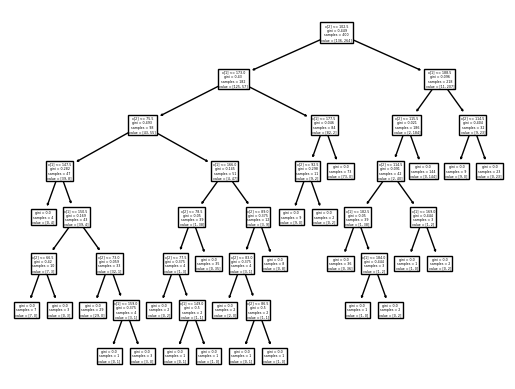

In [24]:
tree.plot_tree(modele_definie)

<h1 style="background-color:#d4a373;font-family:Serif;font-size:250%;color: #fff;text-align:center;border-radius: 50px 50px;">III. Dataset sur la segmentation clientèle</h1><a id="14"></a>

<h3 style="color:#faedcd">1. Traitement du jeu de données - Data Preprocessing</h3>

In [13]:
# Jeu de données d'entrainement
df = pd.read_csv("Train.csv")


# Jeu de données de test
df_test = pd.read_csv("Test.csv")

df

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A
...,...,...,...,...,...,...,...,...,...,...,...
8063,464018,Male,No,22,No,NaN,0.0,Low,7.0,Cat_1,D
8064,464685,Male,No,35,No,Executive,3.0,Low,4.0,Cat_4,D
8065,465406,Female,No,33,Yes,Healthcare,1.0,Low,1.0,Cat_6,D
8066,467299,Female,No,27,Yes,Healthcare,1.0,Low,4.0,Cat_6,B


In [14]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               8068 non-null   int64  
 1   Gender           8068 non-null   object 
 2   Ever_Married     7928 non-null   object 
 3   Age              8068 non-null   int64  
 4   Graduated        7990 non-null   object 
 5   Profession       7944 non-null   object 
 6   Work_Experience  7239 non-null   float64
 7   Spending_Score   8068 non-null   object 
 8   Family_Size      7733 non-null   float64
 9   Var_1            7992 non-null   object 
 10  Segmentation     8068 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 693.5+ KB


In [15]:
# Les duplications
print(df.duplicated().sum())
print(df_test.duplicated().sum())

0
0


### Valeurs manquantes

(8068, 11)
********************
ID                   0
Gender               0
Ever_Married       140
Age                  0
Graduated           78
Profession         124
Work_Experience    829
Spending_Score       0
Family_Size        335
Var_1               76
Segmentation         0
dtype: int64
********************
Pourcentage des valeurs manquantes :
 ID                  0.000000
Gender              0.000000
Ever_Married        1.735250
Age                 0.000000
Graduated           0.966782
Profession          1.536936
Work_Experience    10.275161
Spending_Score      0.000000
Family_Size         4.152206
Var_1               0.941993
Segmentation        0.000000
dtype: float64
********************


Text(0.5, 1.0, 'Distribution des valeurs manquantes')

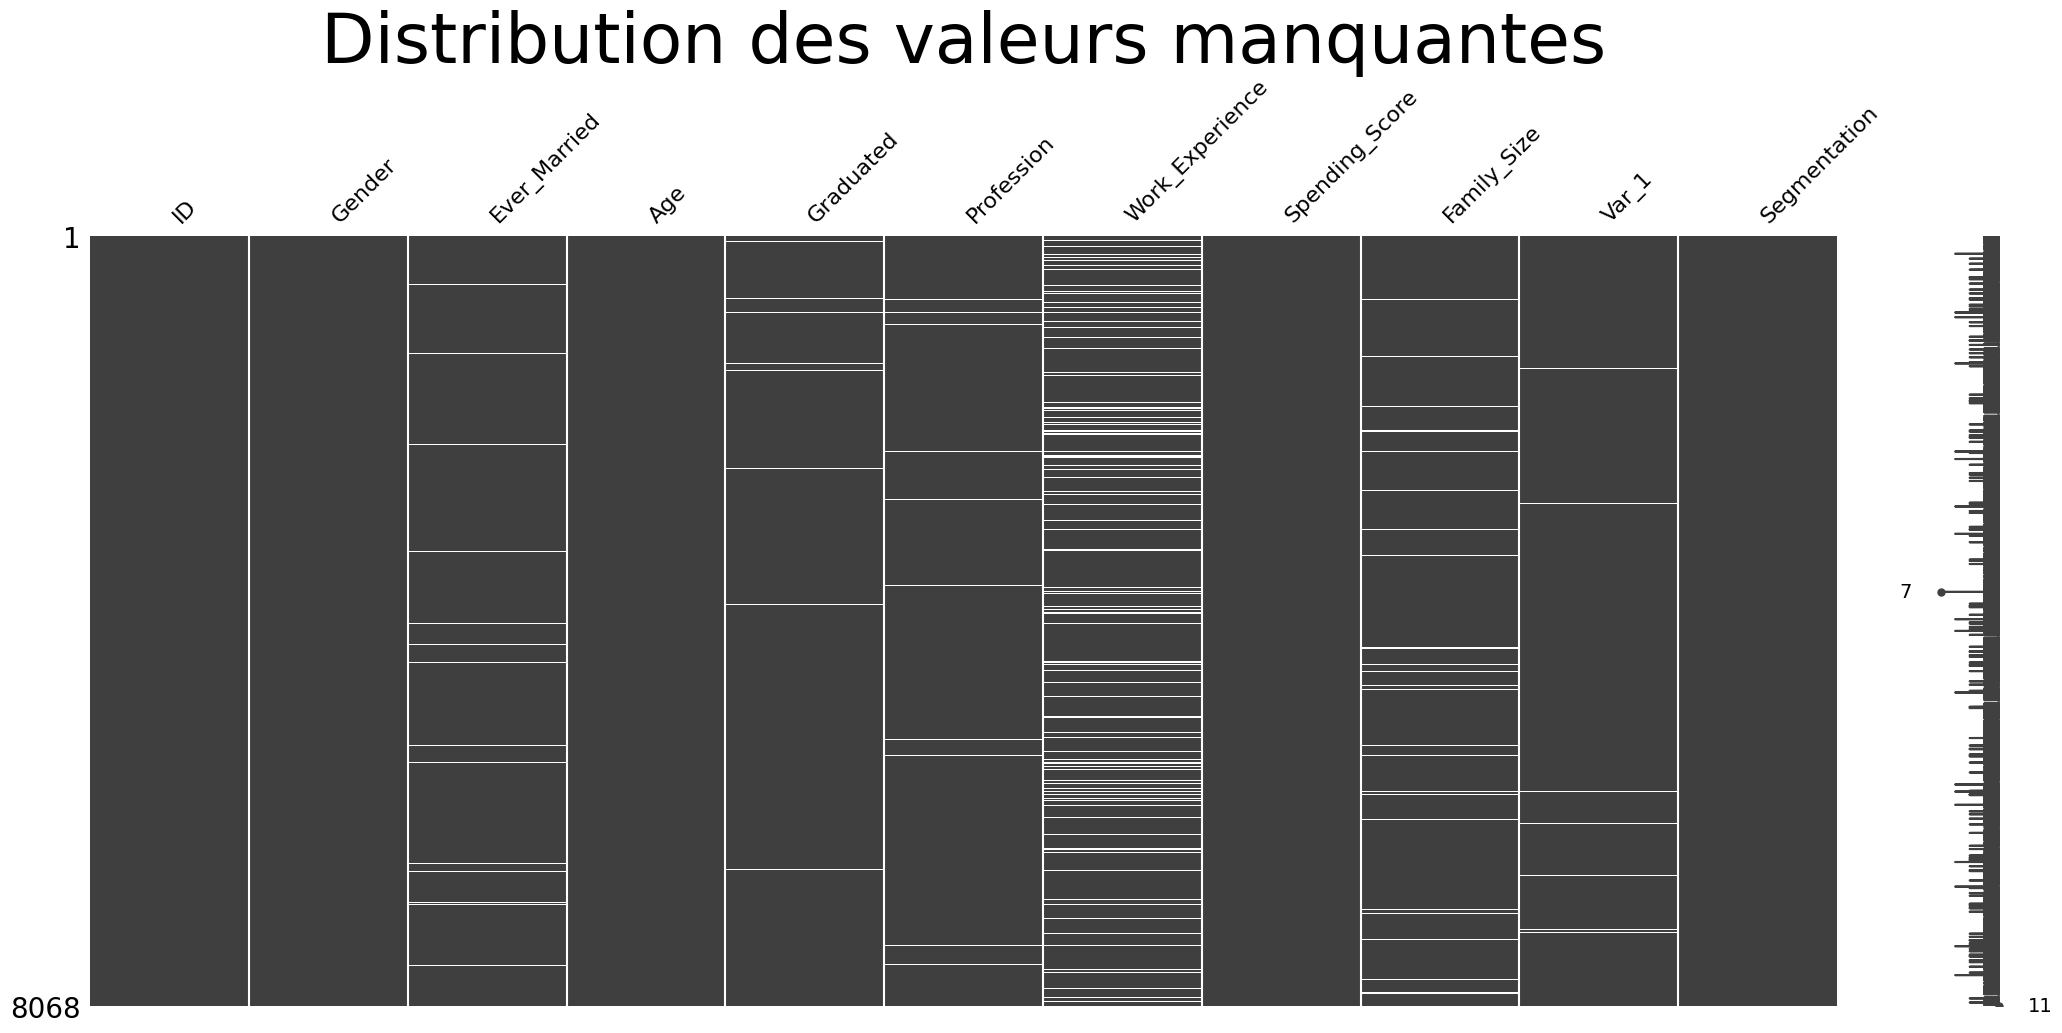

In [16]:
print(df.shape)
print('*'*20)

print(df.isnull().sum())
print('*'*20)

print('Pourcentage des valeurs manquantes :\n',df.isnull().mean()*100 )

print('*'*20)
msno.matrix(df)
plt.title('Distribution des valeurs manquantes',fontsize = 50)

In [17]:
# Description des données de type objet, on en aura besoin pour remplacer les nan par la valeur la plus mentionnée i.e. le mode
df.describe(include='object')

,Gender,Ever_Married,Graduated,Profession,Spending_Score,Var_1,Segmentation
count,8068,7928,7990,7944,8068,7992,8068
unique,2,2,2,9,3,7,4
top,Male,Yes,Yes,Artist,Low,Cat_6,D
freq,4417,4643,4968,2516,4878,5238,2268


In [18]:
# les valeurs distincts de chaque colonne
colTypeObj = df.select_dtypes('object')

for i in colTypeObj:
    print(df[i].value_counts(), end="\n\n")

Male      4417
Female    3651
Name: Gender, dtype: int64

Yes    4643
No     3285
Name: Ever_Married, dtype: int64

Yes    4968
No     3022
Name: Graduated, dtype: int64

Artist           2516
Healthcare       1332
Entertainment     949
Engineer          699
Doctor            688
Lawyer            623
Executive         599
Marketing         292
Homemaker         246
Name: Profession, dtype: int64

Low        4878
Average    1974
High       1216
Name: Spending_Score, dtype: int64

Cat_6    5238
Cat_4    1089
Cat_3     822
Cat_2     422
Cat_7     203
Cat_1     133
Cat_5      85
Name: Var_1, dtype: int64

D    2268
A    1972
C    1970
B    1858
Name: Segmentation, dtype: int64



# Nettoyage de données

    - On remplace les valeurs manquantes de 'Ever_Married' et 'Graduated' par 'NO'.
    - On remplace les valeurs manquantes de 'Profession' et 'Var_1' par la valeur la plus mentionnéé.
    - On remplace les valeurs manquantes de 'Work_Experience' et 'Family_Size' par la valeur la mediane et on enleve 
      les valeurs abberantes.
    - On supprime la colonne ID.
 

In [19]:
# On appliquera la fonction Nettoyer_Donnees sur le trainset et le test set pour les nettoyer

def supp_valAbberantes(df, col):
        qmin, qmax = df[col].quantile(.25), df[col].quantile(.75)
        interq = 1.5 * (qmax - qmin)
        qmin -= interq
        qmax += interq
        return df[col].apply(lambda x: qmin if x < qmin else qmax if x > qmax else x)
    
    
def Nettoyer_Donnees(df):
       
    df['Ever_Married'] = df['Ever_Married'].fillna('No')
    df['Graduated'] = df['Graduated'].fillna('No')
    
    for col in ['Profession', 'Var_1']:
        df[col] = df[col].fillna(df[col].mode().values[0])
        
    for col in ['Work_Experience', 'Family_Size']:
        df[col] = df[col].fillna(df[col].median())
        df[col] = supp_valAbberantes(df, col)
        
    df.drop(columns=['ID'], inplace=True)
    
    segment_map = {'A':1, 'B':2, 'C':3, 'D':4}
    df['Segmentation'] = df['Segmentation'].map(segment_map)
    for col in df.select_dtypes(exclude='number'):
        df[col] = df[col].apply(lambda x: str(x).strip())
    return df

In [20]:
Donnees_nettoye = Nettoyer_Donnees(df)
display(Donnees_nettoye.head())

print('*'*20,'\n')
print(df.shape)

print('*'*20,'\n')
print(Donnees_nettoye.isnull().sum())

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,4
1,Female,Yes,38,Yes,Engineer,1.0,Average,3.0,Cat_4,1
2,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,2
3,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,2
4,Female,Yes,40,Yes,Entertainment,1.0,High,6.0,Cat_6,1


******************** 

(8068, 10)
******************** 

Gender             0
Ever_Married       0
Age                0
Graduated          0
Profession         0
Work_Experience    0
Spending_Score     0
Family_Size        0
Var_1              0
Segmentation       0
dtype: int64


In [21]:
Donnees_Test_nettoye = Nettoyer_Donnees(df_test)
display(Donnees_Test_nettoye.head())

print('*'*20,'\n')
print(df.shape)

print('*'*20,'\n')
print(Donnees_nettoye.isnull().sum())

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,Female,Yes,36,Yes,Engineer,0.0,Low,1.0,Cat_6,2
1,Male,Yes,37,Yes,Healthcare,7.5,Average,4.0,Cat_6,1
2,Female,Yes,69,No,Artist,0.0,Low,1.0,Cat_6,1
3,Male,Yes,59,No,Executive,7.5,High,2.0,Cat_6,2
4,Female,No,19,No,Marketing,1.0,Low,4.0,Cat_6,1


******************** 

(8068, 10)
******************** 

Gender             0
Ever_Married       0
Age                0
Graduated          0
Profession         0
Work_Experience    0
Spending_Score     0
Family_Size        0
Var_1              0
Segmentation       0
dtype: int64


In [22]:
def Transformer_Donnees(df):
    y = df['Segmentation']
    df.drop(columns=['Segmentation'], inplace=True)
    genders = {'Male':0,'Female':1}
    df['Gender'] = df['Gender'].map(genders)

    married = {'No':0,'Yes':1}
    df['Ever_Married'] = df['Ever_Married'].map(married)

    graduate = {'No':0,'Yes':1}
    df['Graduated'] = df['Graduated'].map(graduate)
    for col in df.select_dtypes(exclude='number').columns.values:
        
        df = pd.concat([pd.get_dummies(df[col], prefix=col), df], axis=1)
        df.drop(columns=col, inplace=True)
    return df, y

In [23]:
donnees=Donnees_nettoye.copy()
X, y = Transformer_Donnees(Donnees_nettoye)

X_, y_= Transformer_Donnees(Donnees_Test_nettoye)

In [24]:
# Redimensionnement
x_train=X.values
print(x_train.shape)

x_test=X_.values
print(x_test.shape)

y_train=y.values.reshape(-1,1)
print(y_train.shape)

y_test=y_.values.reshape(-1,1)
print(y_test.shape)

(8068, 25)
(2627, 25)
(8068, 1)
(2627, 1)


<h3 style="color:#faedcd">2. Entrainement sur le jeu de donnés</h3><a id="16"></a>

In [25]:
modele2=DecisionTree()
modele2.fit(x_train,y_train)

In [26]:
predict2=modele2.predict(x_train)
predict2_=modele2.predict(x_test)

print(f'Precision de l arbre: {accuracy_score(predict2,y_train)*100}%')
print(f'Precision de l entrainement: {accuracy_score(predict2_,y_test)*100}%')

Precision de l arbre: 49.65294992563213%
Precision de l entrainement: 32.20403502093643%


<h3 style="color:#faedcd">3. Comparaision avec bibliothèques prédéfinies 'sklearn'</h3><a id="18"></a>

In [28]:
modele_definie2=DecisionTreeClassifier()
modele_definie2.fit(x_train,y_train)

DecisionTreeClassifier()

In [30]:
prediction_definie2=modele_definie2.predict(x_train)
prediction_definie2_=modele_definie2.predict(x_test)

print(f'Precision de l arbre: {accuracy_score(prediction_definie2,y_train)*100}%')
print(f'Precision de l entrainement: {accuracy_score(prediction_definie2_,y_test)*100}%')

Precision de l arbre: 94.98016856717898%
Precision de l entrainement: 31.02398172820708%


<h3 style="color:#faedcd">4. Affichage de l'arbre obtenu</h3><a id="20"></a>

In [31]:
# Affichage de l'arbre codé de zero
modele2.afficher_tree()

X_21 <= 33.0 ? 0.0633392346850602
 gauche:X_21 <= 23.0 ? 0.05400133048444555
  gauche:X_15 <= 0.0 ? 0.045321731176313024
    gauche:4.0
    droit:4.0
  droit:X_10 <= 0.0 ? 0.01839258588826287
    gauche:4.0
    droit:1.0
 droit:X_9 <= 0.0 ? 0.03693061085290228
  gauche:X_10 <= 0.0 ? 0.034566018366716356
    gauche:2.0
    droit:3.0
  droit:X_10 <= 0.0 ? 0.029452520146323047
    gauche:1.0
    droit:2.0


### Tree.plot

[Text(0.40704832464323054, 0.9833333333333333, 'x[21] <= 34.0\ngini = 0.749\nsamples = 8068\nvalue = [1972, 1858, 1970, 2268]'),
 Text(0.12012330132486047, 0.95, 'x[21] <= 24.0\ngini = 0.596\nsamples = 2693\nvalue = [536, 281, 305, 1571]'),
 Text(0.024256214658147902, 0.9166666666666666, 'x[15] <= 0.5\ngini = 0.202\nsamples = 780\nvalue = [25, 25, 35, 695]'),
 Text(0.021303793052801646, 0.8833333333333333, 'x[24] <= 4.5\ngini = 0.609\nsamples = 194\nvalue = [25, 23, 35, 111]'),
 Text(0.016280201219064403, 0.85, 'x[20] <= 0.5\ngini = 0.556\nsamples = 145\nvalue = [21, 11, 22, 91]'),
 Text(0.01229162076815745, 0.8166666666666667, 'x[21] <= 22.5\ngini = 0.532\nsamples = 129\nvalue = [14, 10, 21, 84]'),
 Text(0.00813321583314974, 0.7833333333333333, 'x[24] <= 3.5\ngini = 0.502\nsamples = 106\nvalue = [14, 7, 13, 72]'),
 Text(0.00548946170228391, 0.75, 'x[18] <= 0.5\ngini = 0.484\nsamples = 64\nvalue = [12, 5, 3, 44]'),
 Text(0.0040757876184181535, 0.7166666666666667, 'x[22] <= 0.5\ngini = 

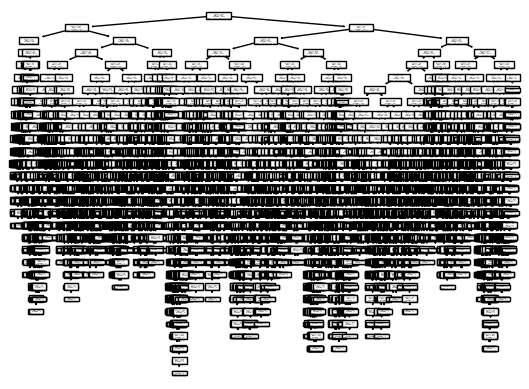

In [45]:
tree.plot_tree(modele_definie2)

<h1 style="background-color:#d4a373;font-family:Serif;font-size:250%;color: #fff;text-align:center;border-radius: 50px 50px;">IV. Comparaison des deux datasets utilisés</h1><a id="22"></a>

Nous pouvons voir que le score de prediction des deux datasets est tres differents.<br>
95% Pour le premier jeu de données contre 31% pour le second.<br>
L'agorithme d'arbre de decicion depend beaucoup du dataset utlisé.

<h1 style="background-color:#d4a373;font-family:Serif;font-size:250%;color: #fff;text-align:center;border-radius: 50px 50px;">IV. Optimisation 'Pruning' </h1><a id="24"></a>

<h3 style="color:#faedcd">1. Pré-Pruning</h3>

### La pré-pruning, également connue sous le nom d'élagage en avant(forward pruning), empêche la génération de branches non significatives.

In [32]:
parametres={'max_depth':[2,4,6,8,10,12],
            'min_samples_split':[2,3,4],
            'min_samples_leaf':[1,2]}

In [33]:
classifier=DecisionTreeClassifier()
recherche_grid=GridSearchCV(estimator=classifier,param_grid=parametres)
recherche_grid.fit(X_train,Y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [2, 4, 6, 8, 10, 12],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 3, 4]})

In [34]:
model=recherche_grid.best_estimator_
model.fit(X_train,Y_train)

predict_=model.predict(X_train)
predict=modele.predict(X_test)

print(f'Precision de l arbre: {accuracy_score(predict_,Y_train)*100}%')
print(f'Precision de l entrainement: {accuracy_score(predict,Y_test)*100}%')

Precision de l arbre: 98.75%
Precision de l entrainement: 95.0%


<h3 style="color:#faedcd">1. Post-Pruning</h3><a id="24"></a>

### Post-pruning, également connu sous le nom d'élagage arrière(backward pruning). C'est le processus où l'arbre de décision est généré en premier, puis les branches non significatives sont supprimées.

In [35]:
chemin=classifier.cost_complexity_pruning_path(X_train,Y_train)
ccp_alphas,impuretes=chemin.ccp_alphas,chemin.impurities
print(ccp_alphas)

[0.         0.00162393 0.001875   0.00197849 0.00242424 0.00488095
 0.00490479 0.00664553 0.01505195 0.02116615 0.0671785  0.20083347]


In [36]:
# Pour chaque alpha, nous ajouterons notre modèle à une liste

classifiers=[]
for alpha in ccp_alphas:
    classifier=DecisionTreeClassifier(random_state=0,ccp_alpha=alpha)
    classifier.fit(X_train,Y_train)
    classifiers.append(classifier)

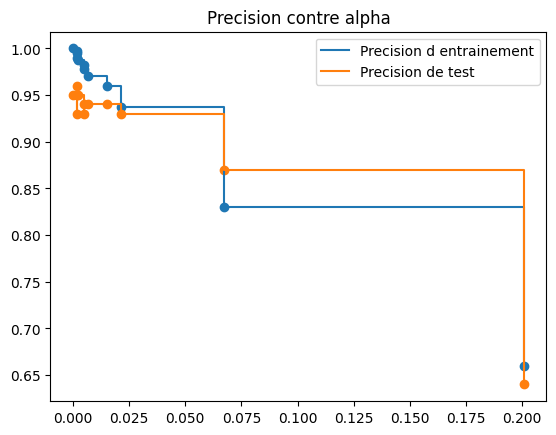

In [37]:
train_acc=[]
test_acc=[]

for  c in classifiers:
    y_train_pred=c.predict(X_train)
    y_test_pred=c.predict(X_test)

    train_acc.append(accuracy_score(y_train_pred,Y_train))
    test_acc.append(accuracy_score(y_test_pred,Y_test))


plt.scatter(ccp_alphas,train_acc)
plt.scatter(ccp_alphas,test_acc)

plt.plot(ccp_alphas,train_acc,label='Precision d entrainement',drawstyle="steps-post")
plt.plot(ccp_alphas,test_acc,label='Precision de test',drawstyle="steps-post")

plt.legend()
plt.title('Precision contre alpha')

plt.show() 

*cpp_alpha = 0.002
Nous pouvons choisir cpp_alpha = 0,002 car nous obtenons la précision de test maximale a peut pres 0,9 ainsi qu'une précision de train optimale. Bien que notre précision de train ait diminué à 0,96, notre modèle est maintenant plus généralisé et il fonctionnera mieux sur des données invisibles.

In [38]:
classifier_=DecisionTreeClassifier(random_state=0,ccp_alpha=0.002)
classifier_.fit(X_train,Y_train)
y_train_pred=classifier_.predict(X_train)
y_test_pred=classifier_.predict(X_test)

print(f'Precision de l entrainement: {accuracy_score(y_train_pred,Y_train)}')
print(f'Precision du test : {accuracy_score(y_test_pred,Y_test)}')

Precision de l entrainement: 0.99
Precision du test : 0.96


<h3 style="color:#bc6c25"> Nous pouvons voir maintenant que notre modèle n'est pas sur-ajusté et que les performances sur les données de test se sont beaucoup améliorées.</h3>

<ul>
<li> L'élagage(pruning) joue un rôle important dans l'ajustement des modèles à l'aide de l'algorithme de l'arbre de décision.</li>

<li>La post-pruning est plus efficace que la pré-pruning.</li>

<li>La sélection de la valeur correcte de cpp_alpha est le facteur clé du processus de post-élagage(post-pruning).</li>

<li>Le réglage des hyperparamètres est une étape importante du processus de pré-élagage(pre-pruning).</li>
</ul>

<h1 style="background-color:#d4a373;font-family:Serif;font-size:250%;color: #fff;text-align:center;border-radius: 50px 50px;">V. Conclusion </h1><a id="26"></a>

Sans aucun doute la meilleure façon de connaître un algorithme est de le programmer à partir de zéro.<br>
Dans ce cas, nous avons codé un arbre de décision à partir de zéro en Python et, sans aucun doute, il est utile de savoir comment fonctionne l'algorithme, les types de fonctions coût qu'il peut utiliser, comment ils fonctionnent et comment les divisions et les prédictions sont faites.

<h3 style="color:#f4a261"> Avantages de l'algorithme d'arbre de décision</h3>
Les classificateurs d'arbre de décision sont parmi les algorithmes prédictifs les plus largement utilisés pour la classification.

Certaines fonctionnalités qui le rendent si populaire sont :
<ul>
<li> Classification extrêmement rapide des enregistrements inconnus.</li> 
<li> Ne tient pas compte des caractéristiques qui n'ont que peu ou pas d'importance dans la prédiction.</li> 
<li> Extrêmement efficace, à condition que les paramètres soient réglés de manière optimale.</li> 
<li> Peu coûteux à construire avec une logique facile à interpréter.</li> 
</ul>

<h3 style="color:#f4a261">Limites de l'algorithme d'arbre de décision</h3>
Bien que le classificateur d'arbre de décision soit l'un des algorithmes de classification les plus sophistiqués, il peut avoir certaines limites, en particulier dans les scénarios du monde réel. Certains de ses moyens de dissuasion sont mentionnés ci-dessous :
<ul>
<li>Les classificateurs d'arbre de décision ont souvent tendance à surajuster les données de formation.</li> 
<li> Les modifications des données peuvent entraîner des modifications inutiles du résultat.</li> 
<li> Les grands arbres peuvent parfois être très difficiles à interpréter.</li> 
<li> Celles-ci sont biaisées vers des fractionnements sur des entités ayant un certain nombre de niveaux.</li> 
</ul>
